In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import jupyter_black

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

jupyter_black.load()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# data source: https://star-history.com/#casact/chainladder-python&lifelib-dev/lifelib&mages/ChainLadder&fumitoh/modelx&Date
data = pd.read_csv("star-history-20250702.csv")
data.columns = ["Package", "Record_Date", "Stars"]
data.head()

,Package,Record_Date,Stars
0,casact/chainladder-python,Mon Oct 09 2017 00:15:42 GMT-0700 (Pacific Day...,1
1,casact/chainladder-python,Sat Mar 23 2019 15:57:41 GMT-0700 (Pacific Day...,14
2,casact/chainladder-python,Mon Feb 10 2020 17:04:34 GMT-0800 (Pacific Sta...,27
3,casact/chainladder-python,Thu Jul 23 2020 08:20:10 GMT-0700 (Pacific Day...,40
4,casact/chainladder-python,Fri Jan 15 2021 07:53:01 GMT-0800 (Pacific Sta...,53


In [3]:
data["Record_Date_P"] = pd.to_datetime(data["Record_Date"].str.slice(start=4, stop=15))
data

,Package,Record_Date,Stars,Record_Date_P
0,casact/chainladder-python,Mon Oct 09 2017 00:15:42 GMT-0700 (Pacific Day...,1,2017-10-09
1,casact/chainladder-python,Sat Mar 23 2019 15:57:41 GMT-0700 (Pacific Day...,14,2019-03-23
2,casact/chainladder-python,Mon Feb 10 2020 17:04:34 GMT-0800 (Pacific Sta...,27,2020-02-10
3,casact/chainladder-python,Thu Jul 23 2020 08:20:10 GMT-0700 (Pacific Day...,40,2020-07-23
4,casact/chainladder-python,Fri Jan 15 2021 07:53:01 GMT-0800 (Pacific Sta...,53,2021-01-15
...,...,...,...,...
66,fumitoh/modelx,Tue Dec 12 2023 07:11:53 GMT-0800 (Pacific Sta...,79,2023-12-12
67,fumitoh/modelx,Fri Jun 07 2024 11:06:24 GMT-0700 (Pacific Day...,85,2024-06-07
68,fumitoh/modelx,Mon Aug 12 2024 11:48:32 GMT-0700 (Pacific Day...,91,2024-08-12
69,fumitoh/modelx,Thu Feb 06 2025 17:48:37 GMT-0800 (Pacific Sta...,97,2025-02-06


In [4]:
data["Package"].unique()

array(['casact/chainladder-python', 'lifelib-dev/lifelib',
       'mages/ChainLadder', 'fumitoh/modelx'], dtype=object)

In [5]:
data["Record_Date_P"].min()

Timestamp('2015-01-07 00:00:00')

In [6]:
data["Record_Date_P"].max()

Timestamp('2025-07-02 00:00:00')

In [7]:
star_axis_max = 175

(0.0, 225.0)

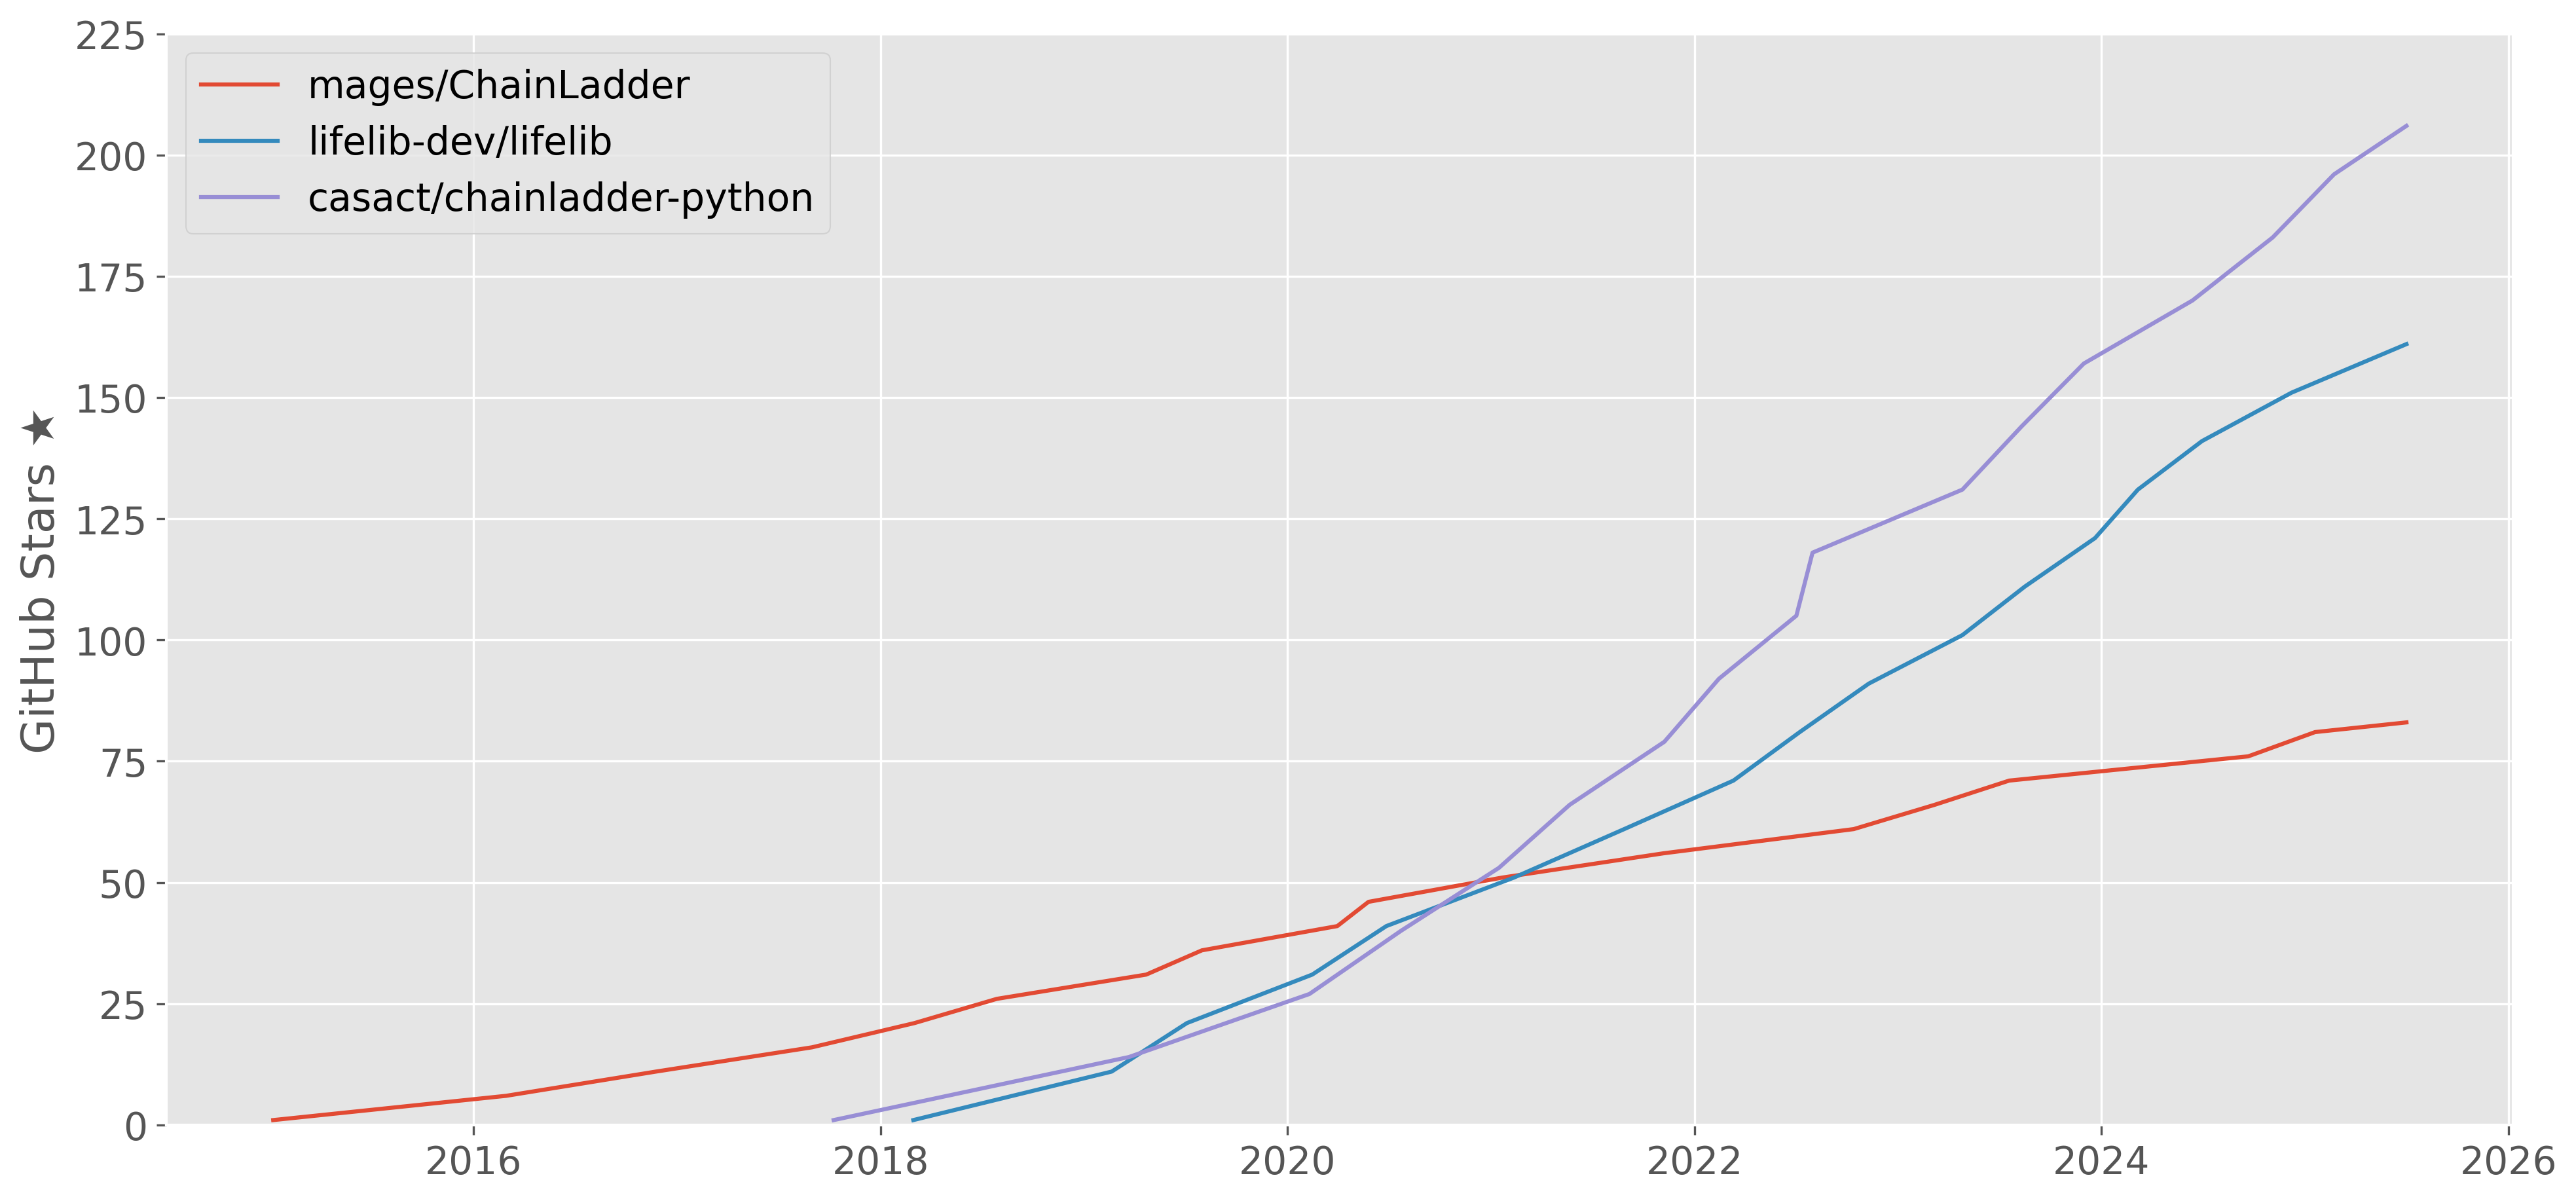

In [24]:
plt.rcParams.update({"font.size": 14})
fig, ax = plt.subplots(figsize=(13, 6), dpi=150, layout="constrained")

ax.plot(
    "Record_Date_P",
    "Stars",
    data=data[data["Package"] == "mages/ChainLadder"],
    label="mages/ChainLadder",
)

ax.plot(
    "Record_Date_P",
    "Stars",
    data=data[data["Package"] == "lifelib-dev/lifelib"],
    label="lifelib-dev/lifelib",
)

ax.plot(
    "Record_Date_P",
    "Stars",
    data=data[data["Package"] == "casact/chainladder-python"],
    label="casact/chainladder-python",
)

ax.legend(loc="upper left")

ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
# ax.set_xlabel("Time")
ax.set_ylabel("GitHub Stars ★")
ax.set_ylim(0, 225)